# Covid-19 Data Visualization

In [23]:
import pandas as pd
import numpy as np
import geopandas as gpd
import geoplot
import mapclassify
import requests
import io
import re
import matplotlib.pyplot as plt

## Step 1: Download the latest JHU Confirmed Cases Dataset

Dataset: [Novel Coronavirus (COVID-19) Cases, provided by JHU CSSE](https://github.com/CSSEGISandData/COVID-19)

In [2]:
CSSEGISandData_Covid19_ts = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv';
timeseries_confirmed_raw = requests.get(CSSEGISandData_Covid19_ts).content
timeseries_confirmed = pd.read_csv(io.StringIO(timeseries_confirmed_raw.decode('utf-8')))
del timeseries_confirmed_raw

Clean up some naming conflicts and group territories by country

In [5]:
replacements_country_names={
    'Korea, South':'South Korea',
    'US': 'United States of America',
    'Taiwan*': 'Taiwan',
    'Tanzania': 'United Republic of Tanzania'
}
timeseries_country_confirmed = timeseries_confirmed.groupby('Country/Region').sum()
timeseries_country_confirmed.rename(index=replacements_country_names,inplace=True)

## Step 2 Prepare the Geopandas World Map

In [8]:
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

world = world[world['name']!='Antarctica'] # takes too much space on the map
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


## Step 3 Join the JHU Confirmed cases with the  Geopandas World Map

In [9]:
geo_timeseries = pd.merge(timeseries_country_confirmed, world, left_index=True, right_on='name', how='right')
geo_timeseries.fillna(0, inplace=True)
geo_timeseries

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/15/20,3/16/20,3/17/20,3/18/20,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,542.6529,-977.7832,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,...,252.0,415.0,478.0,657.0,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,9531.0034,-22951.8209,1.0,1.0,2.0,2.0,5.0,5.0,5.0,5.0,...,3499.0,4632.0,6421.0,7783.0,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,44.0165,21.0059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,55.0,65.0,83.0,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,42.5000,19.3000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,42.6026,20.9030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,10.6918,-61.2225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,5.0,7.0,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


## Step 4 Create a Map Plot for each Day of record

For now we create a map consisting of the number of confirmed cases relative to a countries population.

First we create a map for the most recent entry:

/home/daniel/.local/lib/python3.7/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/home/daniel/.local/lib/python3.7/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: setting k to 8
  Warn("Warning: setting k to %d" % k_q, UserWarning)


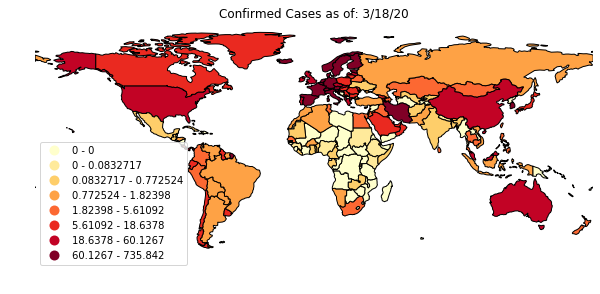

In [57]:
recorded_dates = list(filter(lambda x: re.match('\d{1,2}/\d{1,2}/\d{2}', x), list(geo_timeseries)))
latest_date = recorded_dates[-1]
latest_numbers = geo_timeseries[latest_date] / (world['pop_est'] / 1000000)
scheme = mapclassify.Quantiles(latest_numbers, k=9)

ax = geoplot.choropleth(
    world, hue=latest_numbers, scheme=scheme,
    cmap='YlOrRd', figsize=(10, 5), legend=True
)
_ = ax.set_title('Confirmed Cases as of: ' + recorded_date)

In [58]:
index=0
for recorded_date in recorded_dates:
    
    historic_numbers = geo_timeseries[recorded_date] / (world['pop_est'] / 1000000)
    fig = plt.figure()
    ax = geoplot.choropleth(
        world, hue=historic_numbers, scheme=scheme,
        cmap='YlOrRd', figsize=(10, 5), legend=True
    )
    ax.set_title('Confirmed Cases as of: ' + recorded_date)
    
    ax.figure.savefig('./confirmed-map/map' + str(index).zfill(3) + '.png')
    plt.clf()
    plt.close()
    index+=1

print('Created ' + str(index) + ' images.')

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Created 57 images.


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [59]:
!convert -delay 20 -loop 0 $(ls -1 ./confirmed-map/map*.png | sort -V) ./confirmed-map/animated.gif

Look at the resulting animated GIF

![ConfirmedCases](./confirmed-map/animated.gif "confirmed cases")